<h1> A1: Predicting Car Price</h1>

Please note:
This is version 2 and I use 2 features to predict the car price.

In this assignment, I will solve a problem, i.e., Chaky company makes some car but he has difficulty setting the price for the car. I will make a simple web-based car price prediction system.

This is a regression problem trying to predict car price.

<ul>The followings describe the feautres:
<br></br>
<b>
<li>name
<li>year
<li>selling_price
<li>km_driven
<li>fuel
<li>seller_type
<li>transmission
<li>owner
<li>mileage
<li>engine
<li>max_power
<li>torque
<li>seats
</b>
</ul>

<h2> Task1. Preparing the datasets </h2>

<h3> 1. Importing Libraries </h3>

In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [95]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__, sns.__version__

('1.24.4', '1.5.3', '0.12.2', '3.7.2', '0.12.2')

<h3>1. Load Data</h3>

In [96]:
#read csv
df = pd.read_csv('/root/.vscode-server/data/lab1_Cars.csv')

In [97]:
#print the first row of data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [98]:
#check the shape of the data
df.shape

(8128, 13)

In [99]:
#statistical info Hint:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [100]:
#check data types of the input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [101]:
#check the column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

<h3>2. Exploratory Data Analysis</h3>

EDA is an essential step to inspect the data, so to better understand nature of the given data.

<h4> Renaming </h4>

In [102]:
#Rename "Name" Column to "brand", I will not rename for the rest columns as it is already perfect.
df.rename (
    columns= {'name' : 'brand'}, inplace = True
)

In [103]:
#check the columns name
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

<h4> Label Encoding </h4>

Now I would like to change feature "owner" values to numerical values by mapping <b> First Owner = 1, ..., Test Drive Cars = 5

In [104]:
#check the owner column unique value
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [105]:
#import labelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['owner'] = le.fit_transform (df['owner'])
df['owner'].unique()

array([0, 2, 4, 1, 3])

Again, I will do label encoding for "transmission" feature

In [106]:
#check for my array
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [107]:
df['transmission'] = le.fit_transform(df['transmission'])
df['transmission'].unique()

array([1, 0])

<h4> Other Preparation </h4>

For feature "Fuel" >> I will remove all rows with 'CNG' and 'LPG'

In [108]:
df.shape

(8128, 13)

In [109]:
# Delete rows where 'fuel' == 'CNG'
# Using drop() to delete rows based on column value
df.drop(df[df['fuel'] == 'CNG'].index, inplace = True)

In [110]:
#check after dropping CNG
df.shape

(8071, 13)

In [111]:
# Delete rows where 'fuel' == 'LPG'
# Using drop() to delete rows based on column value
df.drop(df[df['fuel'] == 'LPG'].index, inplace = True)

In [112]:
#check after dropping LPG
df.shape

(8033, 13)

For feature 'mileage', I will remove 'kmpl' using df.mileage.str.split and 
convert column to numerical type (e.g. float)

In [113]:
#usage of split
# series.str.split (pad = None, *, n = -1, expand = flase, regex = None)

#df with split value of columns (set expand = True: it will return a df after splitted the values; n=1: total separations will be 1 time)
df1 = df["mileage"].str.split (" ",n = 1, expand = True)

#making the splitted 0 column as 'mileage' features
df['mileage'] = df1[0]

In [114]:
#check the datatype of a series
df['mileage']

0        23.4
1       21.14
2        17.7
3        23.0
4        16.1
        ...  
8123     18.5
8124     16.8
8125     19.3
8126    23.57
8127    23.57
Name: mileage, Length: 8033, dtype: object

In [115]:
#convert 'mileage' feature DType to float
df['mileage']=df['mileage'].astype('float64')

In [116]:
df['mileage']

0       23.40
1       21.14
2       17.70
3       23.00
4       16.10
        ...  
8123    18.50
8124    16.80
8125    19.30
8126    23.57
8127    23.57
Name: mileage, Length: 8033, dtype: float64

For feature 'engine', I will remove 'CC' and convert it datatype to numerical (float) 

In [117]:
#check feature 'engine'
df['engine']

0       1248 CC
1       1498 CC
2       1497 CC
3       1396 CC
4       1298 CC
         ...   
8123    1197 CC
8124    1493 CC
8125    1248 CC
8126    1396 CC
8127    1396 CC
Name: engine, Length: 8033, dtype: object

In [118]:
#remove CC of engine and put the results into temporary dataframe
df2 = df['engine'].str.split (' ', n = 1, expand = True)
df2

,0,1
0,1248,CC
1,1498,CC
2,1497,CC
3,1396,CC
4,1298,CC
...,...,...
8123,1197,CC
8124,1493,CC
8125,1248,CC
8126,1396,CC


In [119]:
#update the value: update the resulted df[0] to the original df
df['engine']  = df2[0]

#check the df['engine']
df['engine']

0       1248
1       1498
2       1497
3       1396
4       1298
        ... 
8123    1197
8124    1493
8125    1248
8126    1396
8127    1396
Name: engine, Length: 8033, dtype: object

In [120]:
#convert dtype of 'engin' to float
df['engine'] = df['engine'].astype('float64')

For feature 'maxpower', I will repeat the same steps as what I did to feature 'engine'

In [121]:
#check 'maxpower'
df['max_power']

0           74 bhp
1       103.52 bhp
2           78 bhp
3           90 bhp
4         88.2 bhp
           ...    
8123     82.85 bhp
8124       110 bhp
8125      73.9 bhp
8126        70 bhp
8127        70 bhp
Name: max_power, Length: 8033, dtype: object

In [122]:
#remove bhp
df3 = df['max_power'].str.split (" ", n = 1, expand = True)
df3

,0,1
0,74,bhp
1,103.52,bhp
2,78,bhp
3,90,bhp
4,88.2,bhp
...,...,...
8123,82.85,bhp
8124,110,bhp
8125,73.9,bhp
8126,70,bhp


In [123]:
#replace
df['max_power'] = df3[0]
df['max_power']

0           74
1       103.52
2           78
3           90
4         88.2
         ...  
8123     82.85
8124       110
8125      73.9
8126        70
8127        70
Name: max_power, Length: 8033, dtype: object

In [124]:
#change dtype of max_power
df['max_power'] = df['max_power'].astype ("float64")
df['max_power']

0        74.00
1       103.52
2        78.00
3        90.00
4        88.20
         ...  
8123     82.85
8124    110.00
8125     73.90
8126     70.00
8127     70.00
Name: max_power, Length: 8033, dtype: float64

For feature 'brand', I will take only the first word

In [125]:
#check
df['brand'].unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

In [126]:
#split
df4 = df['brand'].str.split (" ", n = 1, expand = True)
df4

,0,1
0,Maruti,Swift Dzire VDI
1,Skoda,Rapid 1.5 TDI Ambition
2,Honda,City 2017-2020 EXi
3,Hyundai,i20 Sportz Diesel
4,Maruti,Swift VXI BSIII
...,...,...
8123,Hyundai,i20 Magna
8124,Hyundai,Verna CRDi SX
8125,Maruti,Swift Dzire ZDi
8126,Tata,Indigo CR4


In [127]:
df['brand'] = df4[0]
df['brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

Drop the feature "torque"

In [128]:
#drop
df = df.drop (columns = ['torque'])

#check the columns
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

I will remove some samples of which 'owner' == test driver car

In [129]:
df.shape

#check my df['owner'] sample to make sure it is correct or not
df[df['owner'] == 3]

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
4383,Volkswagen,2019,1350000,5400,Diesel,Dealer,1,3,22.27,1498.0,108.60,5.0
4950,Audi,2019,6223000,7800,Petrol,Dealer,0,3,15.26,1798.0,187.74,5.0
4951,Audi,2019,5923000,11500,Petrol,Dealer,0,3,15.26,1798.0,187.74,5.0
4952,Audi,2019,6523000,23600,Petrol,Dealer,0,3,15.26,1798.0,187.74,5.0
6220,Honda,2019,2000000,24857,Petrol,Dealer,0,3,16.50,1799.0,139.46,5.0


In [130]:
#drop the samples for test drive car
df.drop(df[df['owner'] == 3].index, inplace = True)

In [131]:
#check the shape
df.shape

# df[df['owner'] == 3]

(8028, 12)

For 'sellingprice', I will transform using the log transform as it is a big number

In [132]:
#check selling_price
df['selling_price']

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 8028, dtype: int64

In [133]:
#log_transform for selling_price
df['selling_price'] = np.log(df['selling_price'])
df['selling_price']


0       13.017003
1       12.821258
2       11.970350
3       12.323856
4       11.775290
          ...    
8123    12.676076
8124    11.813030
8125    12.853176
8126    12.577636
8127    12.577636
Name: selling_price, Length: 8028, dtype: float64

In [134]:
#check the final dataframe
df

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,13.017003,145500,Diesel,Individual,1,0,23.40,1248.0,74.00,5.0
1,Skoda,2014,12.821258,120000,Diesel,Individual,1,2,21.14,1498.0,103.52,5.0
2,Honda,2006,11.970350,140000,Petrol,Individual,1,4,17.70,1497.0,78.00,5.0
3,Hyundai,2010,12.323856,127000,Diesel,Individual,1,0,23.00,1396.0,90.00,5.0
4,Maruti,2007,11.775290,120000,Petrol,Individual,1,0,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,12.676076,110000,Petrol,Individual,1,0,18.50,1197.0,82.85,5.0
8124,Hyundai,2007,11.813030,119000,Diesel,Individual,1,1,16.80,1493.0,110.00,5.0
8125,Maruti,2009,12.853176,120000,Diesel,Individual,1,0,19.30,1248.0,73.90,5.0
8126,Tata,2013,12.577636,25000,Diesel,Individual,1,0,23.57,1396.0,70.00,5.0


<h5>2.1 Univariate Analysis</h5>

Single variable exploratory data analysis

<h5>Couontplot</h5>

<Axes: xlabel='selling_price', ylabel='count'>

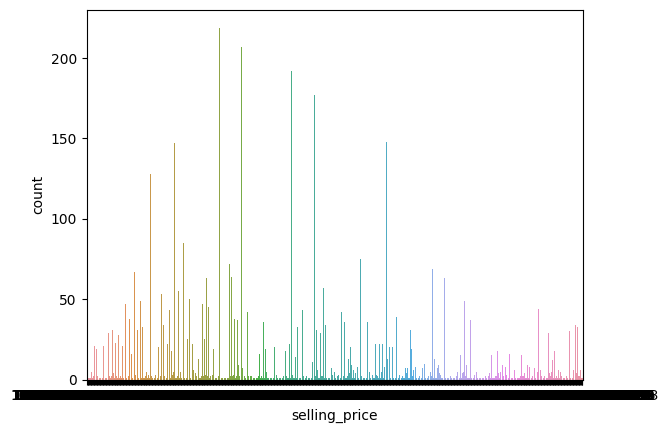

In [135]:
sns.countplot (data = df, x = 'selling_price')

<Axes: xlabel='fuel', ylabel='count'>

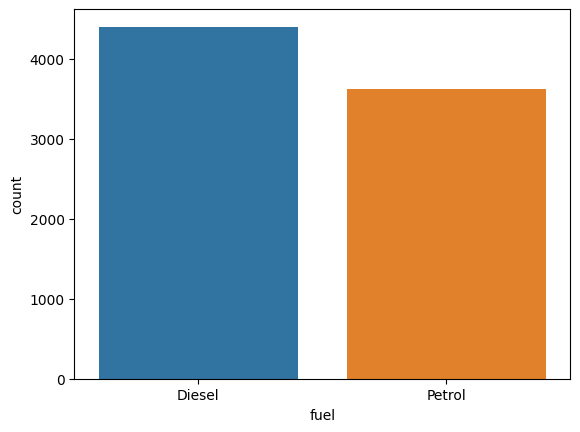

In [136]:
sns.countplot (data = df, x = 'fuel')

<Axes: xlabel='seller_type', ylabel='count'>

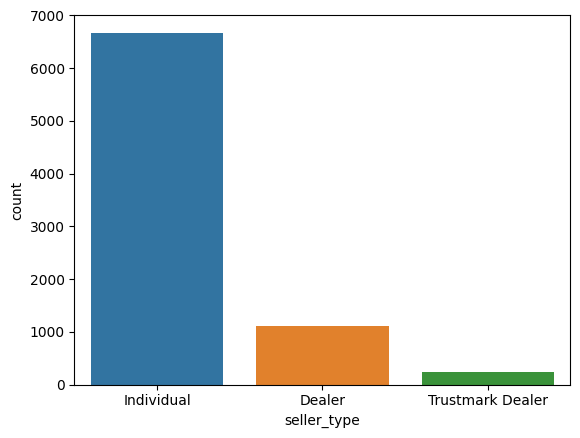

In [137]:
sns.countplot (data = df, x = 'seller_type')

<Axes: xlabel='transmission', ylabel='count'>

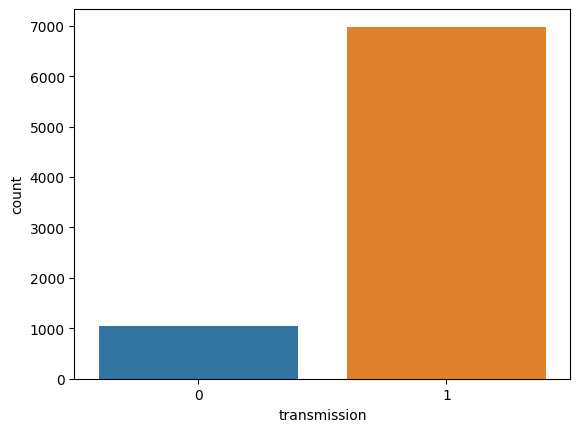

In [138]:
sns.countplot (data = df, x = 'transmission')

<Axes: xlabel='owner', ylabel='count'>

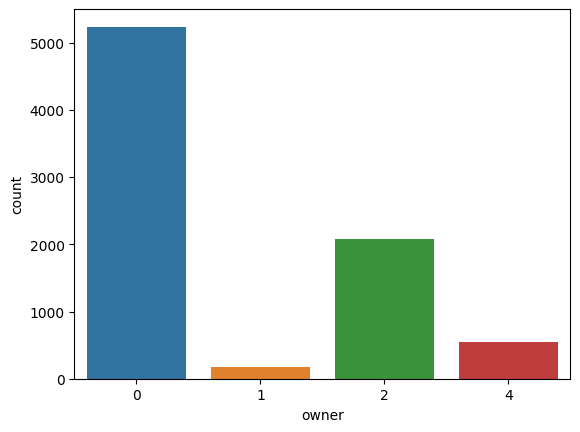

In [139]:
sns.countplot (data = df, x = 'owner')

<Axes: xlabel='seats', ylabel='count'>

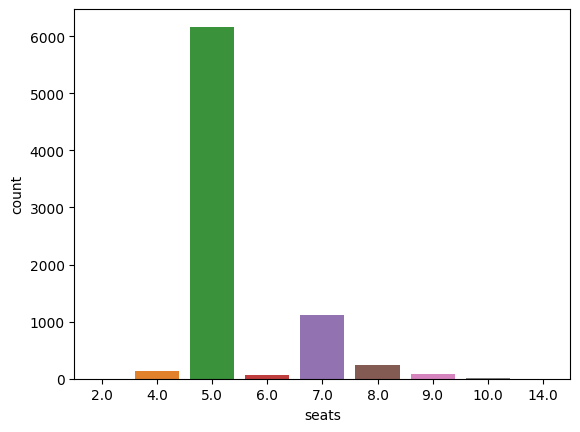

In [140]:
sns.countplot (data = df, x = 'seats')

<h5>Distribution Plot</h5>

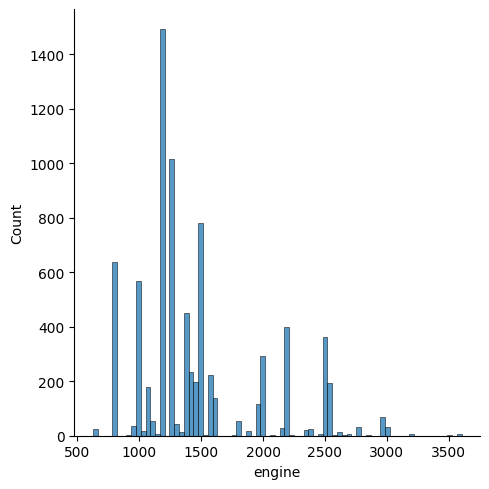

In [141]:
sns.displot(data = df, x = 'engine')

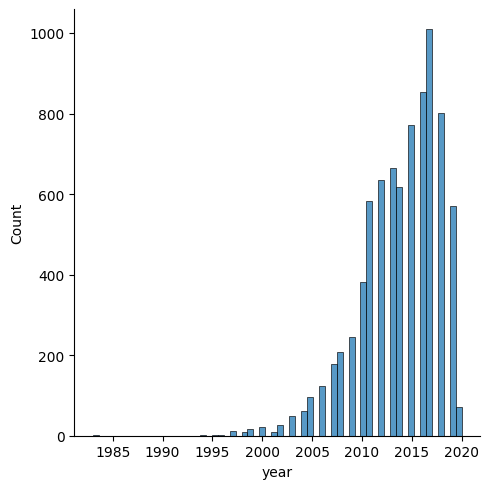

In [142]:
sns.displot(data = df, x = 'year')

<h5>2.2 Multivariate analysis</h5>

Multiple variable exploratory data analysis

<h5>Boxplot</h5>

Text(0.5, 0, 'Year')

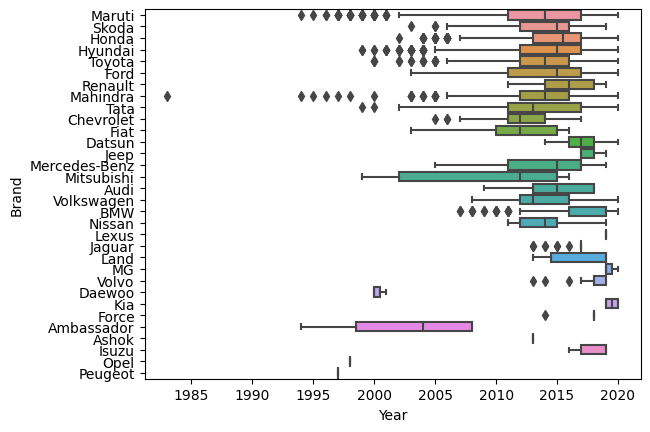

In [143]:
sns.boxplot (x = df['year'], y = df['brand']);
plt.ylabel("Brand")
plt.xlabel("Year")

Text(0, 0.5, 'Fuel')

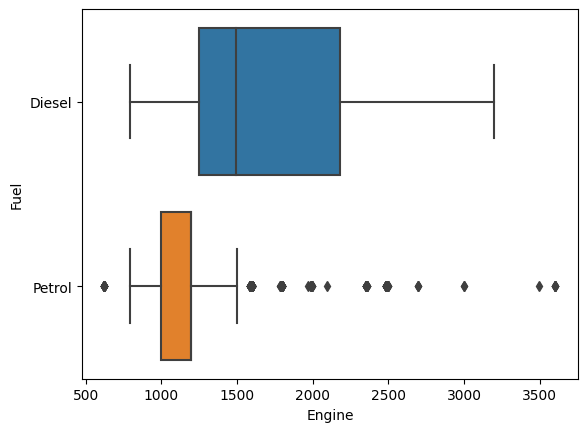

In [144]:
sns.boxplot (x = df['engine'], y = df['fuel']);
plt.xlabel("Engine")
plt.ylabel("Fuel")


Text(0, 0.5, 'selling price')

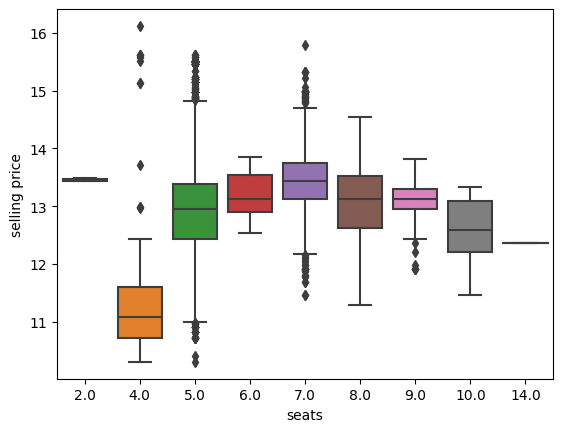

In [145]:
sns.boxplot (x = df['seats'], y = df['selling_price']);
plt.xlabel("seats")
plt.ylabel("selling price")

Text(0, 0.5, 'selling price')

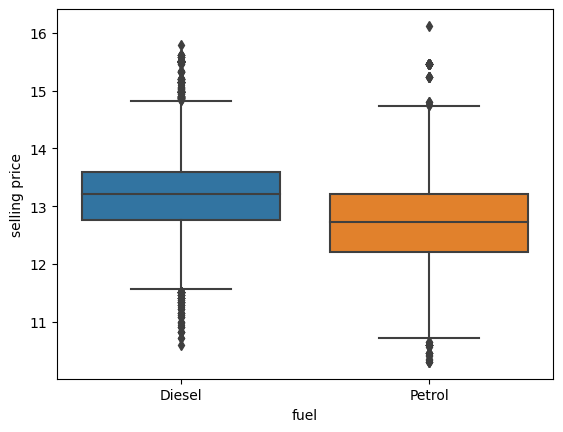

In [146]:
sns.boxplot (x = df['fuel'], y = df['selling_price']);
plt.xlabel("fuel")
plt.ylabel("selling price")

Text(0, 0.5, 'selling_price')

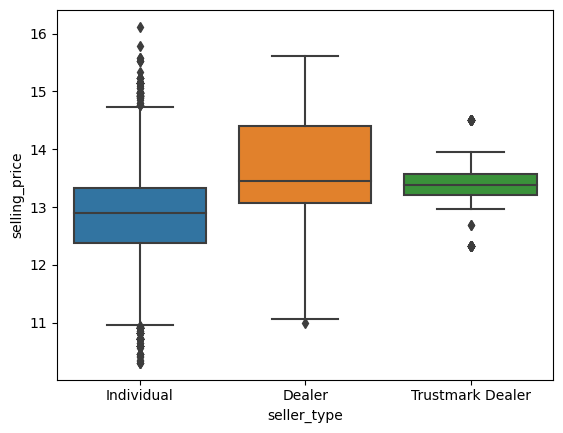

In [147]:
sns.boxplot (x = df['seller_type'], y = df['selling_price']);
plt.xlabel("seller_type")
plt.ylabel("selling_price")

<h5> Scatterplot </h5>

<Axes: xlabel='year', ylabel='selling_price'>

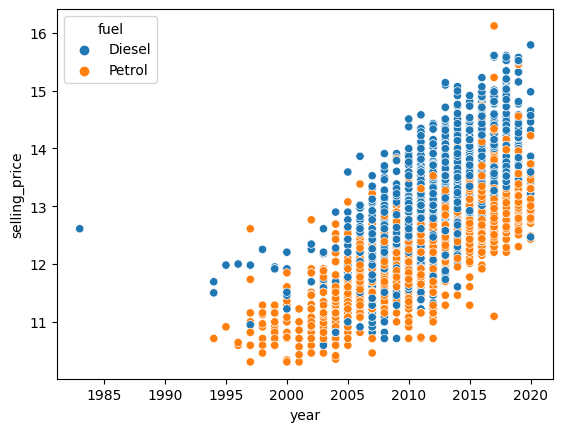

In [148]:
sns.scatterplot (x = df ['year'], y = df['selling_price'], hue = df['fuel'])
#diesel car are more expensive than petrol car

<Axes: xlabel='year', ylabel='selling_price'>

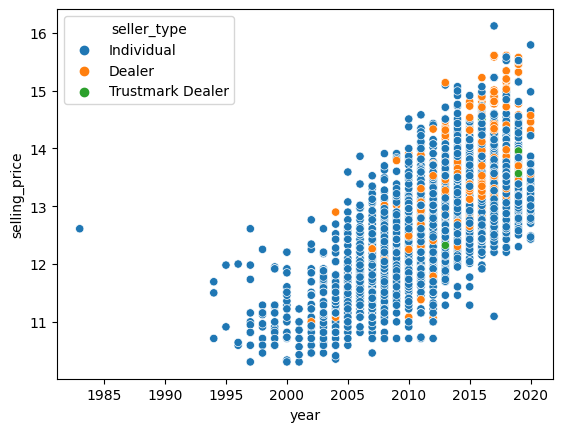

In [149]:
sns.scatterplot (x = df ['year'], y = df['selling_price'], hue = df['seller_type'])

<Axes: xlabel='selling_price', ylabel='brand'>

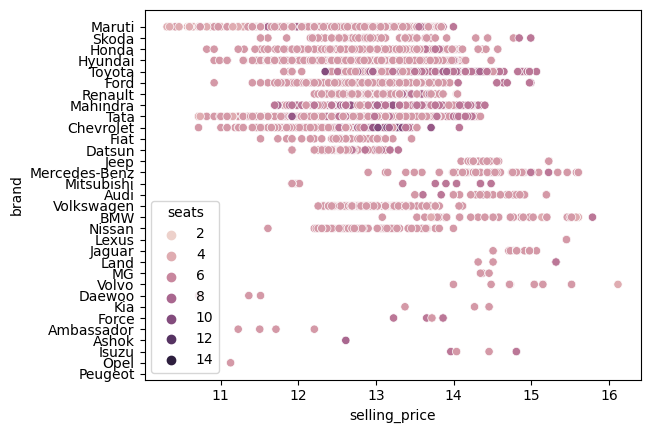

In [150]:
sns.scatterplot (x = df ['selling_price'], y = df['brand'], hue = df['seats'])

<Axes: xlabel='year', ylabel='selling_price'>

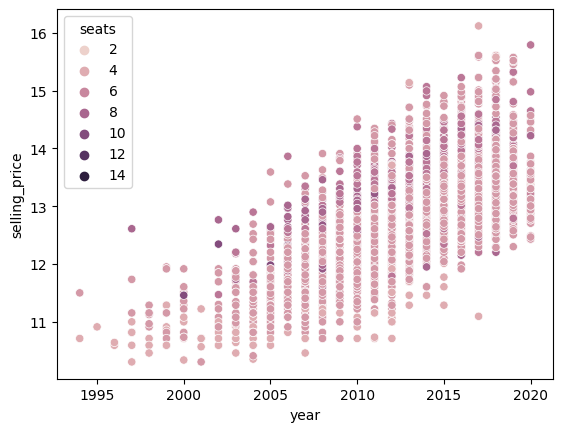

In [151]:
sns.scatterplot (x = df ['year'], y = df['selling_price'], hue = df['seats'])

<h5>Correlation Matrix</h5>

Correlation matrix is used to find strong factors predicting the life expectancy. It's also for checking features are too correlated.

<Axes: >

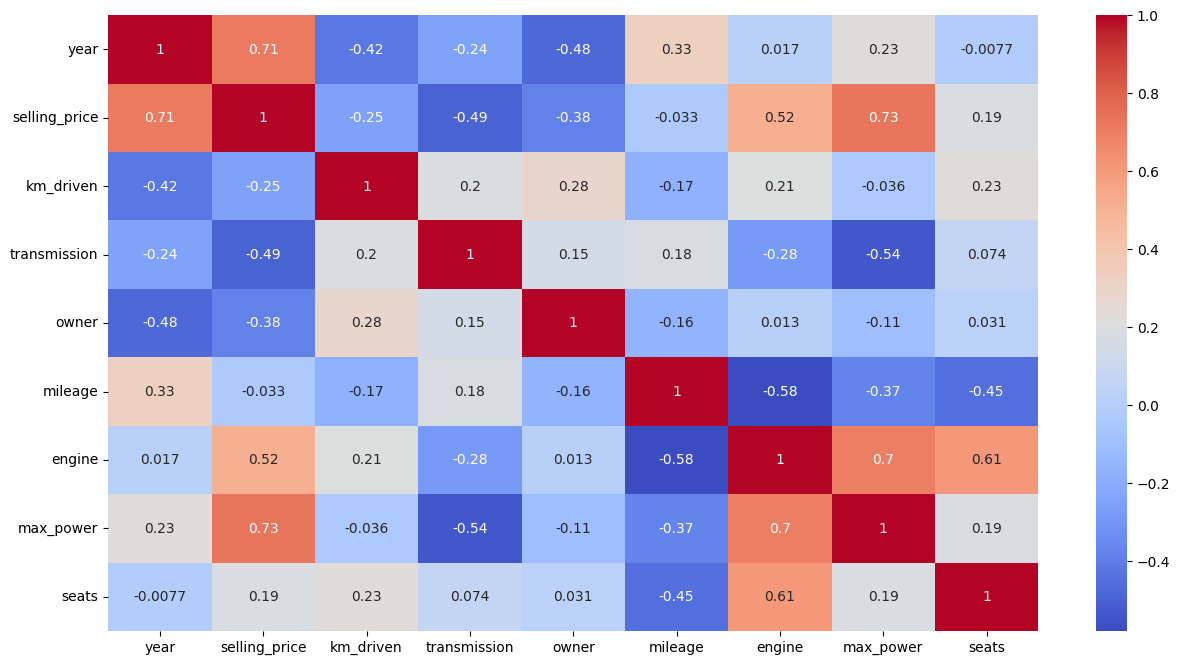

In [152]:
#Check out heatmap
plt.figure (figsize = (15,8))
my_df = df.select_dtypes (exclude = [object])
sns.heatmap (my_df.corr(), annot = True, cmap = 'coolwarm')

<h4>Predictive Power Score</h4>

In [153]:
import ppscore as pps

#before using pps

<Axes: xlabel='x', ylabel='y'>

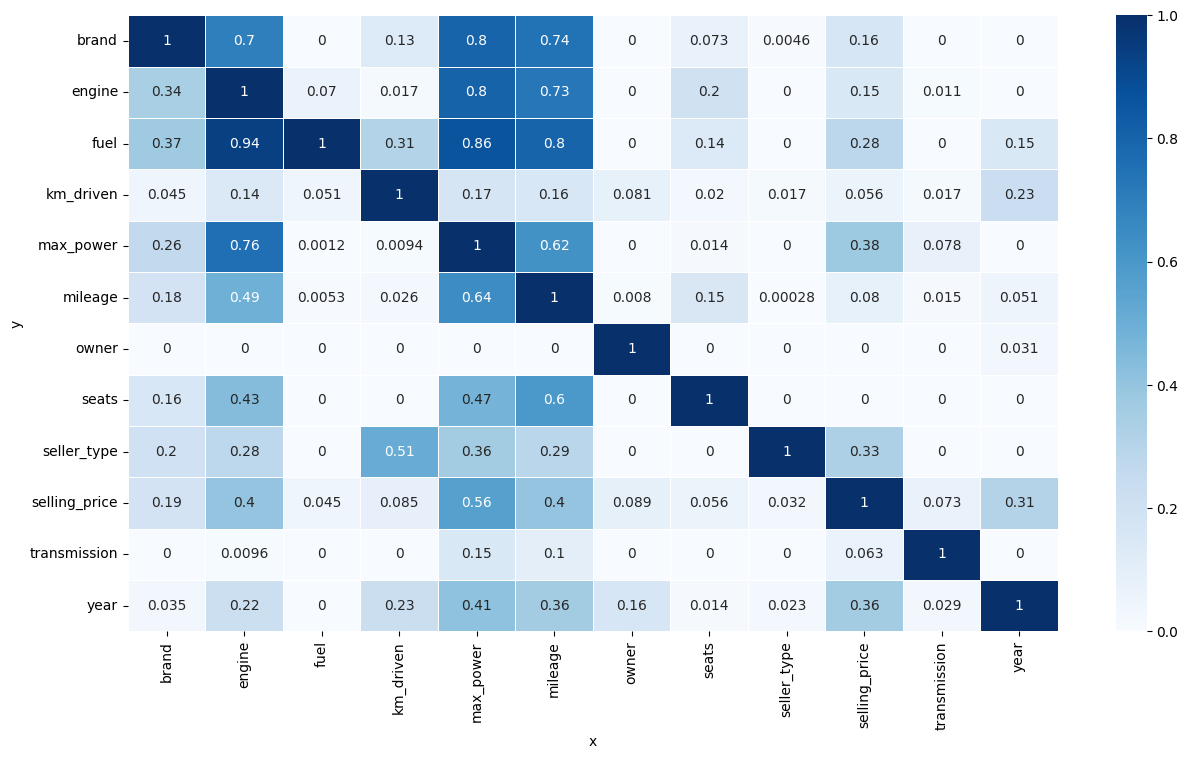

In [154]:

#ppscore_df = df.select_dtypes (exclude = [object])
matrix_df = pps.matrix(df)[['x','y','ppscore']].pivot (columns='x', index = 'y', values= 'ppscore')

#plot
plt.figure (figsize = (15,8))
sns.heatmap (matrix_df, vmin = 0, vmax = 1, cmap = "Blues", linewidths = 0.5, annot = True)

<h3>3. Feature Engineering</>

<h3>4. Feature Selection</h3>

In [155]:
#feature selection
X2 = df[['engine','year']]
y2 = df['selling_price']

In [156]:
#train test split
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.3, random_state=4)

In [157]:
X_train2.shape

(5619, 2)

In [158]:
#preprocessing

#check for null values
X_train2[['engine','year']].isna().sum()

engine    152
year        0
dtype: int64

In [159]:
X_test2[['engine','year']].isna().sum()

engine    62
year       0
dtype: int64

In [160]:
y_train2.isna().sum()

0

In [161]:
y_test2.isna().sum()

0

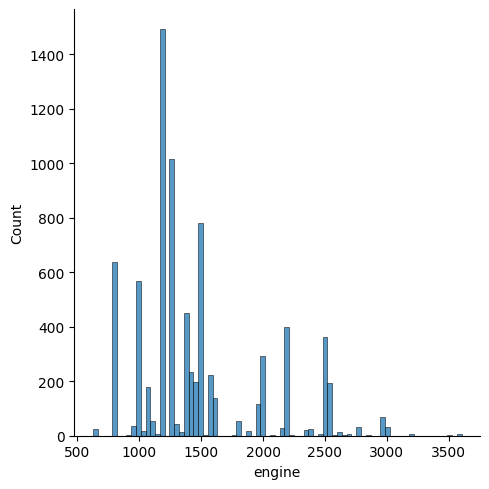

In [162]:
sns.displot(data = df, x = 'engine')

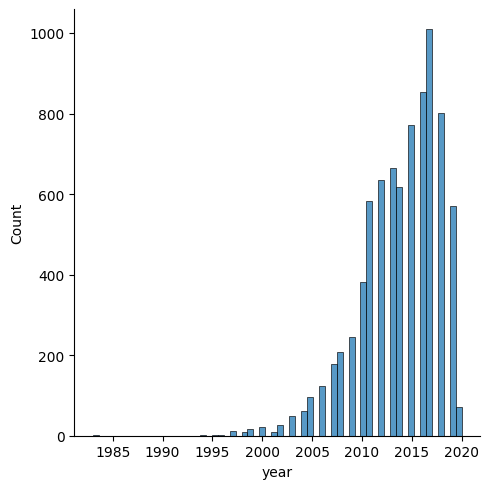

In [163]:
sns.displot (data = df, x = 'year')

In [164]:
#fill for the engine
X_train2['engine'].fillna (X_train2['engine'].median(), inplace = True)
X_test2['engine'].fillna (X_train2['engine'].median(), inplace = True)

In [165]:
X_train2[['engine', 'year']].isna().sum()

engine    0
year      0
dtype: int64

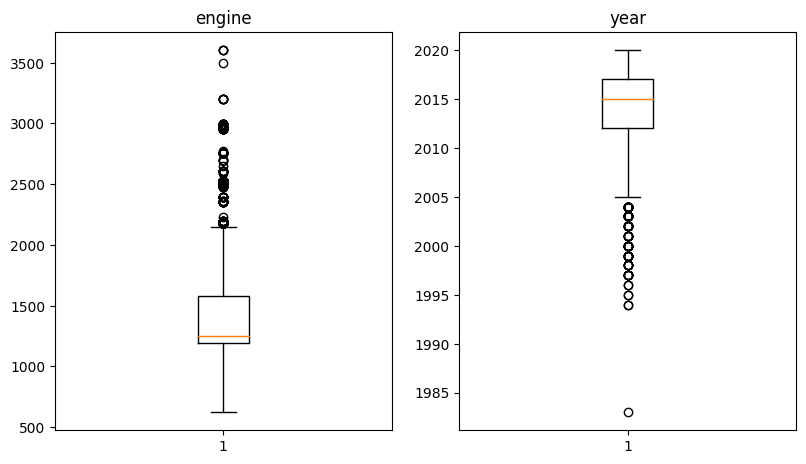

In [166]:
#checking outliers
#create dictionary column
col_dict2 = {'engine':1, 'year':2}

plt.figure (figsize = (20,30))

for variable,i in col_dict2.items():
    plt.subplot (5,4,i)
    plt.boxplot (X_train2[variable])
    plt.title (variable)
plt.show()

In [167]:
def outlier_count (col, data = X_train2):
    q752, q252 = np.percentile (data[col], [75, 25])
    
    iqr = q752-q252
    
    min_val2 = q252 - (iqr * 1.5)
    max_val2 = q752 + (iqr * 1.5)
    
    outlier_count2 = len(np.where ((data[col]> max_val2) | (data[col]<min_val2))[0])
    
    outlier_percentate2 = round (outlier_count2 / len(data[col])*100,2)
    
    if (outlier_count2 > 0):
        print ("\n" +15*'-' + col + 15*'-' + "\n")
        print ("Number of outliers: {}".format (outlier_count2))
        print ('Percentage of data that is outlier:{}'.format(outlier_percentate2))

In [168]:
for col in X_train2.columns:
    outlier_count (col)


---------------engine---------------

Number of outliers: 838
Percentage of data that is outlier:14.91

---------------year---------------

Number of outliers: 149
Percentage of data that is outlier:2.65


In [169]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
X_train2 = scaler2.fit_transform(X_train2)
X_test2  = scaler2.transform(X_test2)

In [170]:
#cross validation tech
#importing regression algorithms libraries
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#put the models that we will use into a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state=0), RandomForestRegressor(n_estimators = 100, random_state = 0)]

#the names of the models
algorithms_names = ['LinearRegression', 'SVR', 'KNeighborsRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor']

In [171]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

#lists for keeping MSE
train_mse = []
test_mse = []

#defining number of splits using kfold
kfold = KFold (n_splits = 8, shuffle = True)

In [172]:

#finding the scores for all the algorithms:
for i, model in enumerate (algorithms):
    scores2 = cross_val_score (model, X_train2, y_train2, cv=kfold, scoring='neg_mean_squared_error')
    print (f"{algorithms[i]} - Scores: {scores2}; Mean: {scores2.mean()}")

LinearRegression() - Scores: [-0.17783757 -0.16022218 -0.17352667 -0.19257788 -0.1894425  -0.1766152
 -0.19867819 -0.19476893]; Mean: -0.1829586392277482


SVR() - Scores: [-0.12679858 -0.12235379 -0.13391059 -0.13864264 -0.13536281 -0.11860319
 -0.13673179 -0.12325418]; Mean: -0.12945719589385915
KNeighborsRegressor() - Scores: [-0.0876955  -0.1094431  -0.09788888 -0.09465698 -0.0989109  -0.0928704
 -0.09655993 -0.10518201]; Mean: -0.09790096283611889
DecisionTreeRegressor(random_state=0) - Scores: [-0.08665166 -0.0958608  -0.09552405 -0.07463419 -0.08683844 -0.078611
 -0.06793433 -0.07643924]; Mean: -0.08281171382056318
RandomForestRegressor(random_state=0) - Scores: [-0.08359518 -0.09125337 -0.07412477 -0.07743065 -0.07742361 -0.06424388
 -0.07344084 -0.0769715 ]; Mean: -0.07731047394135988


In [173]:
#Grid Search
from sklearn.model_selection import GridSearchCV

param_grid =  {'bootstrap' : [True], 'max_depth' : [5,10, None], 'n_estimators': [5,6,7,8,9,10,11,12,13,14,15]}

rf = RandomForestRegressor (random_state = 1)

grid = GridSearchCV (estimator=rf,
                     param_grid=param_grid,
                     cv=kfold,
                     n_jobs=-1,
                     return_train_score=True,
                     refit=True,
                     scoring='neg_mean_squared_error')


In [174]:
grid.fit (X_train2, y_train2);

In [175]:
grid.best_params_

{'bootstrap': True, 'max_depth': None, 'n_estimators': 15}

In [176]:
best_mse = grid.best_score_
best_mse

-0.07796192259303047

In [177]:
#testing
yhat2 = grid.predict(X_test2)
mean_squared_error(y_test2, yhat2)

0.07572350535239224

<h2> 8. Analysis of Feature Importance </h2>

<h5>Algorithm way</h5>

In [178]:
#stored in this variable
#random forest grid

rf = grid.best_estimator_
rf.feature_importances_

array([0.4145462, 0.5854538])

<BarContainer object of 2 artists>

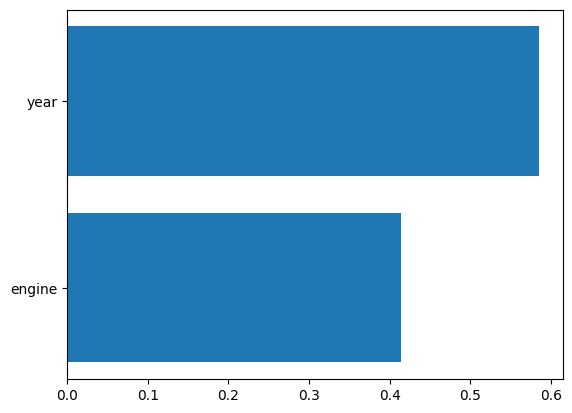

In [179]:
#let's plot
plt.barh (X2.columns, rf.feature_importances_)

Text(0.5, 0, 'RandomForestRegressor')

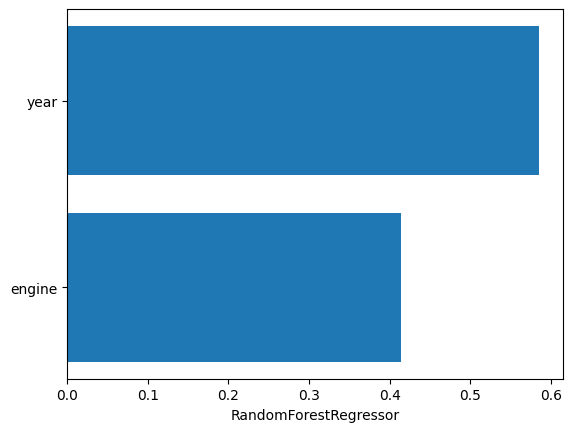

In [180]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh (X2.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel ("RandomForestRegressor")

<h5> Permutation way </h5>

Text(0.5, 0, 'RandomForestRegressor')

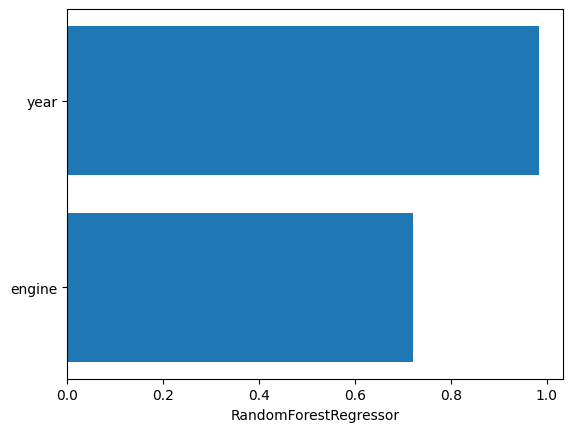

In [181]:
from sklearn.inspection import permutation_importance

per_imp = permutation_importance(rf, X_test2, y_test2)

#plot
sorted_idx = per_imp.importances_mean.argsort()
plt.barh (X2.columns[sorted_idx], per_imp.importances_mean[sorted_idx])
plt.xlabel ("RandomForestRegressor")

<h5> Shape Way </h5>

In [182]:
import shap

explainer = shap.TreeExplainer (rf)
shap_values = explainer.shap_values (X_test2)

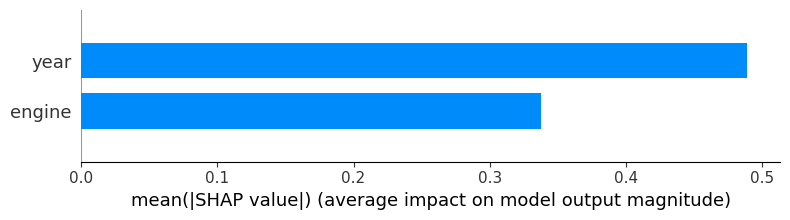

In [183]:
#shap provides plot
shap.summary_plot (shap_values, X_test2, plot_type="bar", feature_names=X2.columns)

<h2> Inference </h2>

In [184]:
import pickle

In [185]:
#save the model to disk
filename = 'CarPricePrediction_2f_v2.model'
model = {
    'model': grid,
    'scaler': scaler2
}
pickle.dump (model, open(filename,'wb'))

In [186]:
# load the model from disk
loaded_model = pickle.load (open (filename, 'rb'))
model = loaded_model['model']
scaler = loaded_model['scaler']

In [187]:
#try to create one example
#transform predicted y value back to original value
df['selling_price'] = np.exp (df['selling_price'])
df[['engine','year','selling_price']].loc[2]

engine             1497.0
year               2006.0
selling_price    158000.0
Name: 2, dtype: float64

In [188]:
sample = np.array([[1497,2006]])
sample = scaler.transform(sample)

In [189]:
predicted_car_price_1 = model.predict(sample)
predicted_car_price = np.exp (predicted_car_price_1)
predicted_car_price

array([173254.35306364])

In [190]:
# predicted_car_price_1

4488301.339588621

<h2> Summary</h2>

- which features are important? why?

Car price prediction dataset contains the followings features:
<ul>
<li>brand name
<li>year
<li>selling_price
<li>km_driven
<li>fuel
<li>seller_type
<li>transmission
<li>owner
<li>mileage
<li>engine
<li>max_power
<li>torque
<li>seats
</ul>

Among these features, I think features such as brand,owner,engine, mileage and km_driven are important because in the real world we decide the price based on that features.

But according to my PPS score, I get the followings features as the good ones for the system: max_power (0.56), engine (0.4), mileage (0.4), year (0.37).

I check that features in my correlation heatmap to find the correalations between the features and I got the follwings as good scores:
<table>
    <tr>
        <th> Feature1 </th>
        <th> Feature2 </th>
        <th> Correlation </th>
    </tr>
    <tr>
        <td> engine </td>
        <td> year </td>
        <td> 0.017 </td>
    </tr>
    <tr>
        <td> max_power </td>
        <td> year </td>
        <td> 0.23 </td>
    </tr>
     <tr>
        <td> max_power </td>
        <td> mileage </td>
        <td> -0.37 </td>
    </tr>
     <tr>
        <td> mileage </td>
        <td> year </td>
        <td> 0.33 </td>
    </tr>
</table>

Firstly, I trained the model using <b> max_power and transmission </b> features and my system got the best mse scores for my testing: 0.14958196632849394

Secondly, I trained the model using <b> engine and year </b> features and my system got the best mse scores for my testing: 0.1262169064167092

According to my mse score among my above two trainings, I take the second training expirements features (engine and year) to build my model.


- which algorithm performs well? which does not? why?

Here's an analysis of my results:

Linear Regression has the worst mean score of approximately -0.1829.
Support Vector Regression (SVR) performs better than Linear Regression with a mean score of approximately -0.1289.
K-Nearest Neighbors Regression has an even better mean score of approximately -0.0992.
Decision Tree Regression improves further with a mean score of approximately -0.0823.
Random Forest Regression performs the best among the models tested, with a mean score of approximately -0.0772.
From these results:

Random Forest Regression is the best-performing model on my dataset among the ones I have tested, followed closely by the Decision Tree Regression.
Linear Regression is the least effective model for the dataset based on the provided scores.
